# QBUS6850 - Machine Learning for Business
## Tutorial 3 - Linear Regression 1 - Solution

## Task 1 - Linear Regression Manually

Use the following code to generate synthetic data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression

N = 20

# Generate synthetic data
x, y, true_coef = make_regression(n_samples = N, n_features = 1, noise=20, coef=True)

# Scatter plot
plt.figure()
plt.scatter(x, y)

X = np.column_stack((np.ones(N), x))

# Convert X to a matrix
X = np.asmatrix(X)

# Estimate linear regression coefficients 
lin_betas = np.linalg.inv(X.T*X) * X.T * y.reshape(N,1)

# beta_0
lin_intercept = lin_betas[0,0]
print("intercept (beta_0): {0:.2f}".format(lin_intercept))

# beta_1
lin_beta = lin_betas[1,0]
print("beta_1: {0:.2f}".format(lin_beta))

x_1 = 1

prediction = lin_intercept + lin_beta * x_1

print("Predicted value at x = {0}: {1:.2f}".format(x_1, prediction))


intercept (beta_0): -7.93
beta_1: 44.45
Predicted value at x = 1: 36.52


## Task 2 - Linear Regression And Prediction

- Load the "auction.txt" dataset
- Get some info of the data, such as minimum and maximum of Age and Price.
- Check linear association between variables,  using corellation coefficients
- Choose an appropriate variable to regress against price
- Fit model
- Predict the sale price of a clock that is 121 years old

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load data
clock_auction_df = pd.read_csv("auction.txt", delimiter="\t")
#Get some info of the data
clock_auction_df.info()
clock_auction_df.head()
clock_auction_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
Age        32 non-null int64
Bidders    32 non-null int64
Price      32 non-null int64
dtypes: int64(3)
memory usage: 848.0 bytes


,Age,Bidders,Price
count,32.000000,32.000000,32.000000
mean,144.937500,9.531250,1327.156250
std,27.395476,2.839632,393.134395
min,108.000000,5.000000,729.000000
25%,117.000000,7.000000,1053.000000
50%,140.000000,9.000000,1257.500000
75%,168.500000,11.250000,1560.750000
max,194.000000,15.000000,2131.000000


###  Check linear association between variable


In [3]:
clock_auction_df.corr()


,Age,Bidders,Price
Age,1.000000,-0.253749,0.730233
Bidders,-0.253749,1.000000,0.394640
Price,0.730233,0.394640,1.000000


Variable Age has stronger linear association with Price than Bidders. Fit a model Price ~ Age.

In [4]:

x_data = np.reshape(clock_auction_df["Age"].values, (len(clock_auction_df), 1))
#x_data = np.reshape(clock_auction_df["Age"], (len(clock_auction_df), 1)) doest not work for some Python version
y_data = np.reshape(clock_auction_df["Price"].values, (len(clock_auction_df), 1))




In [5]:
# Create the linear regression object
lr_obj = LinearRegression()

# Estiamte coefficients
lr_obj.fit(x_data, y_data)


# Predict the sale price of a 121 year old clock
age = 121

predicted_price = lr_obj.predict(age)

print("Estimated Sale Price: ${0:.2f}".format(predicted_price[0, 0]))

ValueError: Expected 2D array, got scalar array instead:
array=121.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Task 3 - Linear Regression Gradient Descent Manually

In this task, we will build our own Gradient Descent algorithm for linear regression.  This may serve an example for your assignment 1.

Import package numpy and matplotlib.pyplot:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Build a gradient descent function, name it as "Gradient_Descent_Algo":

In [7]:
"""
Build the gradient descent function

"""
# m denotes the number of training examples here, not the number of features
def Gradient_Descent_Algo(x, y, beta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        # predicted values from the model
        model_0 = np.dot(x, beta)
        loss_temp = model_0 - y
        # calculte the loss function
        loss = np.sum(np.square(loss_temp)) / (2 * m)
        # save all the loss function values at each step
        loss_total[i]= loss
        #You can check iteration by
        #print("Iteration: {0} | Loss fucntion: {1}".format(i, loss))
        # calcualte the gradient using matrix representation
        gradient = np.dot(xTrans, loss_temp) / m
        # update the parameters simulteneously with learning rate alpha
        beta = beta - alpha * gradient
        # save all the estimated parametes at each step
        beta_total[i,:]= beta.transpose()
    return beta

Generate synthetic data from a linear model 

$\ \ f(x,\beta) = \beta_0 + \beta_1 x $, where $ \  \beta_0=4, \ \beta_1=1.5$,

Add noise to true values

$ \ \ t = f(x,\beta) + \epsilon \ $,   where $ \ \epsilon \ $ comes from a normal distribution with mean=0, standard deviation = 0.1

Produce a scatter plot of $t$ against $x$.

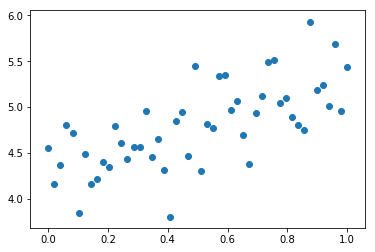

In [8]:
# Initialise RNG to generate the same random numbers each time
np.random.seed(0)

m = 50 #number of training examples
x = np.linspace(0.0, 1.0, m)

# Function true coefficients/parameters
beta0 = 4
beta1 = 1.5
 
# true values from linear model
f = beta0 + beta1 * x
# Add noisy
sigma2 = 0.1
y = f + np.random.normal(0, np.sqrt(sigma2), m)

# reshape
y = np.reshape(y, (len(y), 1))

x_data_1 = np.reshape(x, (len(x), 1))
x = np.column_stack((np.ones(len(x)), x_data_1))

fig0 = plt.figure()
plt.scatter(x[:,1],y)
#fig0

Fitting model by using function "Gradient_Descent_Algo", (set learning rate α=0.0005α=0.0005 stop iteration after 10,000 iterations).

In [26]:
# using a specific number of iterations as stopping criteria
numIterations= 100000
# select the learning rate
alpha = 0.0005
loss_total= np.zeros((numIterations,1))
beta_total= np.zeros((numIterations,2))
# # parameters starting values
beta_initial = np.reshape(np.zeros(2),(2, 1))
beta = Gradient_Descent_Algo(x, y, beta_initial, alpha, m, numIterations)
# # print(beta)

 Plot loss function, $\beta_0$ and $\beta_1$  against the number of iterations, 

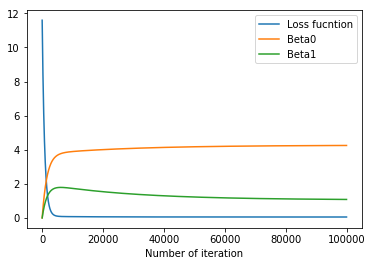

In [10]:
fig1 = plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.legend(loc="upper right")
plt.xlabel("Number of iteration")
plt.show()
#fig1